# COMP0142

# Assignment 2: Polynomial Regression & Logistic Regression

## Introduction

In this assignment you will implement Polynomial regression and Logistic regression using the library Scikit-learn. 

In Part A of the assignment we will focus on Polynomial regression with and without regularization. First, we will load the train and test dataset and we will fit a simple polynomial of order 2 to see how to combine the classes `PolynomialFeatures` and `LinearRegression`. Then we will fit polynomials of different orders to the training data and we will compute the Mean Squared Error (MSE) of the train and test datasets. We will plot the MSE values to find out which polynomial order fits the data better. Afterwards we will select a specific polynomial degree and we will observe and analyse the impact of regularisation.

In Part B of the assignment we will compute a Logistic Regression Classifier with `LogisticRegression`. We will fit the model using the training dataset and we will compute the accuracy of the classifier on the train and test dataset. 


## Guidelines

- The structure of the code is given to you and you will need to fill in the parts corresponding to each question. 
- You will have to submit the completed notebook in the Jupyter notebook format: `.ipynb`.
- Do not modify/erase other parts of the code if you have not been given specific instructions to do so.
- When you are asked to insert code, do so between the areas which begin:
  
  `##########################################################`
  
  `# TO_DO`
  
  `# [your code here]`
   
   And which end:
   
  `# /TO_DO
   ##########################################################`


- When you are asked to comment on the results you should give clear and comprehensible explanations. Write the comments in a 'Code Cell' with a sign `#` at the beginning of each row, and in the areas which begin:

  `# [INSERT YOUR ANSWER HERE]`

## Imports

Please do not change the cell below, you will see a number of imports. All these packages are relevant for the assignment and it is important that you get used to them. You can find more information about them in the respective documentations. The most relevant for this assignment is Scikit-learn:

https://scikit-learn.org/stable/

In [1]:
# PLEASE DO NOT CHANGE THIS CELL

import pandas as pd
import numpy as np

# Standard python libraries for data and visualisation
import matplotlib.pyplot as plt

# SciKit Learn a python ML Library
# Import models
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Import error metric
from sklearn.metrics import mean_squared_error

# Import data munging tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Load files
import pickle

# Part A: Polynomial Regression [80 marks]

In Lecture 4, we introduced a 1-dimensional input dataset, that gave rise to the following set of $n$ output,input pairs:

$$ \mathcal{S} =\{ x^{(i)}, y^{(i)} \}^{n}_{i=1}$$

We want to fit a polynomial of degree $k$ to form the following prediction function:

$$ f_k(x) =  w_0 + w_1 x + w_2 x^2 + \ldots + w_k x^k $$

We can transform this problem to a linear regression problem by transforming the input data:

$$\mathbf{X} = \left[\begin{array}{cccc}
1 & x^{(1)} & (x^{(1)})^2 & \dots & (x^{(1)})^k \\
1 & x^{(2)} & (x^{(2)})^2 & \dots & (x^{(2)})^k \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x^{(n)} & (x^{(n)})^2 & \dots & (x^{(n)})^k \\
\end{array}\right], 
\mathbf{y} = \left[\begin{array}{c}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(n)}
\end{array}\right], 
\mathbf{w} = \left[\begin{array}{c}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_k
\end{array}\right]
$$

`PolynomialFeatures` transforms the 1-dimensional array $[x^{(1)},...,x^{(n)}]^T$ into the matrix $\mathbf{X}$. Now, we can use the `LinearRegression` class to fit the data as we did during the regression class.

The loss function that the model is minimising is:

\begin{equation}
\mathsf{L}(\mathcal{E},\mathcal{S}, \mathbf{w}) = \Vert\mathbf{y}- \mathbf{Xw}\Vert^2_2
\end{equation}

We begin by loading the data and plotting it:

In [2]:
# PLEASE DO NOT CHANGE THIS CELL
# Load Data

with open('data_pol_fit.pkl', 'rb') as handle:
    data = pickle.load(handle)

X = data['X']
y = data['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

X_grid = np.linspace(-2,2,num=100)[:,np.newaxis]

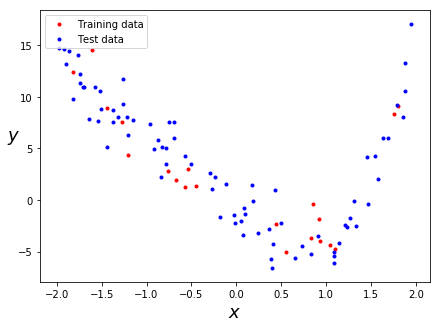

In [3]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x_train, y_train, c='r', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='b', marker='.', label="Test data")
ax.legend()
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

We fit a polynomial of order 2 to the training dataset and we plot the results:

In [4]:
# PLEASE DO NOT CHANGE THIS CELL

poly_features = PolynomialFeatures(degree=2)

x_train_poly = poly_features.fit_transform(x_train)
X_grid_poly = poly_features.fit_transform(X_grid)

lin_reg = LinearRegression()
lin_reg.fit(x_train_poly, y_train)

y_grid_pred = lin_reg.predict(X_grid_poly)

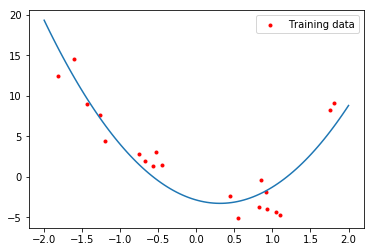

In [5]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots()
ax.scatter(x_train, y_train, c='r', marker='.', label="Training data")
ax.legend()
plt.plot(X_grid, y_grid_pred)
plt.show()

### _Question 1 [20 marks]_

Using the same approach fit 0-th to 10-th order polynomials to the training data. 
For each polynomial order you should:

- Create a Polynomial features instance (call it poly_features) and transform your training and test datasets
- Create a Linear regression model (call it lin_reg) and fit it with the train set
- Compute the predictions of the model for the train and test set
- Compute the Mean Square Error for the train and test set (think about using the `mean_squared_error` function for Scikit-learn) and append the values to mses_train and mses_test



In [6]:
########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

y_preds = []
mses_train = []
mses_test = []
max_degree = 10
for degree in range(max_degree+1):
#
########################################################

########################################################
# TO_DO
#[your code here]

    # creating the polynomial features instance
    poly_features = PolynomialFeatures(degree=degree)

    # transforming training and test datasets
    x_train_poly = poly_features.fit_transform(x_train)
    X_grid_poly = poly_features.fit_transform(X_grid)
    x_test_poly = poly_features.fit_transform(x_test)

    # creating a linear regression model
    lin_reg = LinearRegression()
    # fitting model with train set
    lin_reg.fit(x_train_poly, y_train)

    # computing predictions of model
    y_grid_pred = lin_reg.predict(X_grid_poly)
    
    # computing local mean squared error for train and test
    local_mses_train = mean_squared_error(y_train,lin_reg.predict(x_train_poly))
    local_mses_test = mean_squared_error(y_test,lin_reg.predict(x_test_poly))
    # appending local values to global array
    mses_train.append(local_mses_train)
    mses_test.append(local_mses_test)

# /TO_DO
########################################################

########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

    X_grid_poly = poly_features.fit_transform(X_grid)
    y_grid_pred = lin_reg.predict(X_grid_poly)
    y_preds.append(y_grid_pred)
#
########################################################

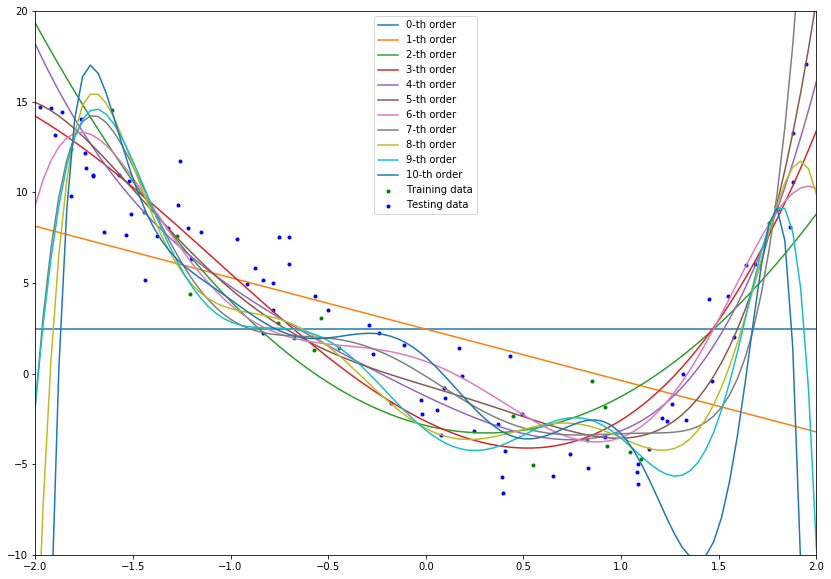

In [7]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(x_train, y_train, c='g', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='b', marker='.', label="Testing data")

for degree in range(0,max_degree+1):
    ax.plot(X_grid, y_preds[degree], label="{}-th order".format(degree))

ax.axis([-2, 2, -10, 20])
ax.legend()
plt.show()

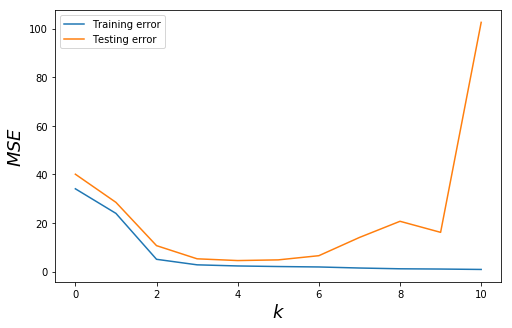

In [8]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(mses_train, label="Training error")
ax.plot(mses_test, label="Testing error")
plt.xlabel("$k$", fontsize=18)
plt.ylabel("$MSE$",fontsize=18)
ax.legend()
#ax.axis([0, 10, 0, 40])
plt.show()

### _Question 2 [20 marks]_
What is your interpretation of the mean squared error plot? What is happening between $k = 0$ and $k = 10$? Which polynomial order you think fits better the data?

In [9]:
# [INSERT YOUR ANSWER HERE]
#
# The training mean squared error shows a relatively simple negative correlation between 
# polynomial coefficient and MSE, with MSE decreasing with increasing k. The error drops most 
# significantly between 0 and 2k, and approaches 0 after this very gradually.
#
# The testing MSE shows a simular trend to the training MSE up until around 4k. After this 
# value the MSE decreases gradually until 6k, then more significantly until 8k. This section 
# shows a roughly linear trend between MSE and k. After 8k the MSE decreases again, and then
# increases sharply after 9k from around 20 to 100 MSE between 9k and 10k.
#
# The increase in testing MSE after around 4 k implies that our test data is overfitted at 
# higher polynomial orders. Noise and fluctuations could have been piced up by the model here, 
# causing the model to learn them and apply them to later data. However this new model is not
# necessarily accurate for later data, causing overfitting and the models lack of ability to
# generalise.
#
# The testing MSE is always greater than training MSE. This is expected as our model is
# fitted and trained based on the training set.
#
# Both MSE are lowest at k=4 so this is the polynomial order that best fits the data (no 
# overfitting and minimal test and train MSE).

### Regularization

In this section, we will analyse the impact of regularization in the model fitting. 

We will implement Polynomial Ridge Regression so the loss function is:

\begin{equation}
\mathsf{L}(\mathcal{E},\mathcal{S},\mathbf{w}) = \Vert\mathbf{y}- \mathbf{Xw}\Vert^2_2 + \lambda \Vert\mathbf{w}\Vert^2_2
\end{equation}

where $\lambda$ is the regularization parameter.

To observer the impact of regularization we will specify that the polynomial order is 6 (we could have chosen any another order) and we will fit the polynomial regression with different $\lambda$ values.

We will use the `Ridge` Scikit-learn class. You can find information and examples of how to use it in:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

### _Question 3 [20 marks]_

Fit a 6-th order polynomial to the training data.

For each polynomial order you should:

- Create a Ridge regression model `Ridge` (call it ridge_reg) with the lambda_value and fit it to the train set
- Compute the predictions of the model for the train and test set
- Compute the Mean Square Error for the train and test set (think about using the `mean_squared_error` function for Scikit-learn) and append the values to mses_train and mses_test


In [10]:
# PLEASE DO NOT CHANGE THIS CELL

lambda_list = np.logspace(-3.0, 2.0, num=20)
print(lambda_list)

[1.00000000e-03 1.83298071e-03 3.35981829e-03 6.15848211e-03
 1.12883789e-02 2.06913808e-02 3.79269019e-02 6.95192796e-02
 1.27427499e-01 2.33572147e-01 4.28133240e-01 7.84759970e-01
 1.43844989e+00 2.63665090e+00 4.83293024e+00 8.85866790e+00
 1.62377674e+01 2.97635144e+01 5.45559478e+01 1.00000000e+02]


In [11]:
########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

y_preds = []
mses_train = []
mses_test = []

poly_features = PolynomialFeatures(degree=6)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)
X_grid_poly = poly_features.fit_transform(X_grid)

for lambda_value in lambda_list:
#
#########################################################

#########################################################
# TO_DO
#[your code here]
    
    # creating Ridge regression model
    ridge_reg = Ridge(alpha=lambda_value)
    # fitting prediction to train set
    ridge_reg.fit(x_train_poly, y_train)
    
    # computing local mean squared error for train and test
    local_mses_train = mean_squared_error(y_train,ridge_reg.predict(x_train_poly))
    local_mses_test = mean_squared_error(y_test,ridge_reg.predict(x_test_poly))
    # appending local values to global array
    mses_train.append(local_mses_train)
    mses_test.append(local_mses_test)
      
# /TO_DO
#########################################################

#########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

    y_grid_pred = ridge_reg.predict(X_grid_poly)
    y_preds.append(y_grid_pred)
#
#########################################################

We plot the MSE of the train and test set for each lamba_value:

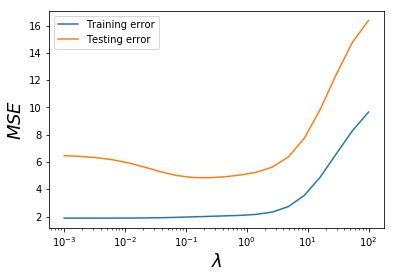

In [12]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots()
ax.plot(lambda_list,mses_train, label="Training error")
ax.plot(lambda_list,mses_test, label="Testing error")
ax.legend()
plt.xlabel("$\lambda$", fontsize=18)
plt.ylabel("$MSE$",fontsize=18)
ax.set_xscale('log')
plt.show()

In [13]:
# PLEASE DO NOT CHANGE THIS CELL

lambda_argmin = np.argmin(mses_test)
lambda_opt  = lambda_list[lambda_argmin]
print(lambda_opt)

0.23357214690901212


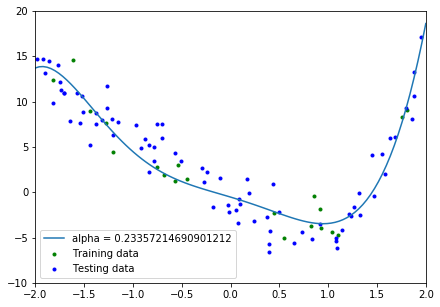

In [14]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x_train, y_train, c='g', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='b', marker='.', label="Testing data")

ax.plot(X_grid, y_preds[lambda_argmin], label="alpha = {}".format(lambda_opt)) 

ax.axis([-2, 2, -10, 20])
ax.legend()
plt.show()

### _Question 4 [20 marks]_
What is your interpretation of the mean squared error plot? What happens when $\lambda$ increases? Is the regularization working?

In [15]:
# [INSERT YOUR ANSWER HERE]
#
# The testing MSE plot shows gradual decrease of the regularization parameter (lambda)
# initially, then an increase from 0.1 lambda onwards, with a sharp increase just before 10 
# lambda. 
#
# The training MSE plot shows a more exponential trend, with MSE around 2 until just before 10
# lambda, and a sharp increase after this. 
#
# As in Q2, testing error MSE is always greater than training as expected. Both MSEs show that
# the model struggles to fit the train set at high lambda, as MSE is very high.
#
# Regularization generally discourages the model from teaching itself to be more complex, 
# hence reducing overfitting. Our lambda value sets how flexible we want our model to be. As 
# lambda approaches 0, the regularization parameter has no effect. After this it enforces more 
# and more strictly how much the model is allowed to learn from the data and therefore deviate 
# from the existing model. 
#
# This causes the decrease in MSE until just before 0.1 lambda, as the models overfitting is 
# reduced. However after this there is an increase, as the model can deviate from its previous
# state by less and less, and is therefore not 'learning' causing the data not to be fitted 
# well. Our model is the least flexible as lambda tends to higher values, and MSE is 
# increased.
#
# Therefore an increased lambda will naturally give us a higher MSE, as our model is more
# flexible and therefore greater overfitting will occur. 



# Part B: Logistic Regression [20 marks]

In this part of the Assignment, we will implement a simple Logistic Regrestion model.

First, we upload the *Indian Liver Patient Dataset* (you can find more information about this dataset in https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset) ). 

Then we plot all the data attributes by pairs in a scatter matrix.

In [16]:
# PLEASE DO NOT CHANGE THIS CELL

import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [17]:
# PLEASE DO NOT CHANGE THIS CELL

df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv', header = None).dropna()

le = preprocessing.LabelEncoder()
le.fit(df[1])
df[1] = le.transform(df[1])

X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values.ravel()

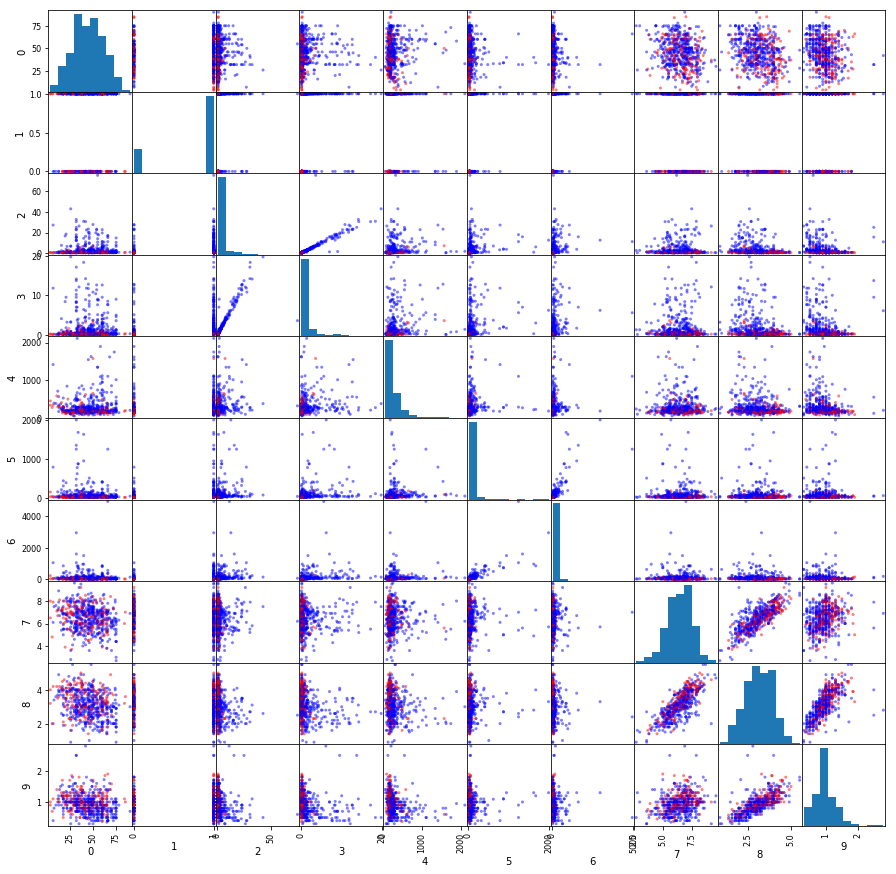

In [18]:
# PLEASE DO NOT CHANGE THIS CELL

plot = pd.plotting.scatter_matrix(df.iloc[:,:-1],figsize = (15,15), c = y, cmap = 'bwr')

### _Question 5 [20 marks]_

We have now the input data in $X$ and the classes for each in $y$. 

Now, do the following:

- Use the `train_test_split` function to split the data between train and test (with training comprising 80% of the original data set). 
- Use the `StandardScaler` function to standarize the data using the training data as input.
- Use the `LogisticRegression` class to build a Logistic Regression model for the data. 
- Fit the model on the training set and then compute the accuracy of the classifier on the training and test set.
- Save the values on the variables acc_train and acc_test.

In [19]:
########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

acc_train = 0
acc_test = 0
#
#######################################################

#######################################################
# TO_DO

# splitting data between train and test appropriately
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# standardizing data
#stand = preprocessing.StandardScaler()
stand = StandardScaler()
stand.fit(x_train)
x_test_stand = stand.transform(x_test)
x_train_stand = stand.transform(x_train)

# building logistic regression model to data
log_reg = LogisticRegression(solver='lbfgs', random_state=42).fit(x_train_stand, y_train)

# saving values
acc_train = sklearn.metrics.accuracy_score(y_train, log_reg.predict(x_train_stand))
acc_test = sklearn.metrics.accuracy_score(y_test, log_reg.predict(x_test_stand))

# /TO_DO
##########################################################

########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

print('The accuracy for the training set is:',acc_train)
print('The accuracy for the testing set is:',acc_test)
#
#######################################################

The accuracy for the training set is: 0.7537796976241901
The accuracy for the testing set is: 0.6551724137931034
